# 7.2 梯度下降和随机梯度下降

In [53]:
%matplotlib inline
import numpy as np
import torch
import math
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

## 7.2.1 一维梯度下降

In [2]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x  # f(x) = x * x的导数为f'(x) = 2 * x
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


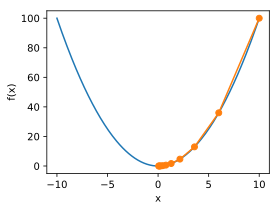

In [12]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize((4,3))
    d2l.plt.plot(f_line, [x**2 for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')

show_trace(res)

## 7.2.2 学习率

epoch 10, x: 3.4867844009999995


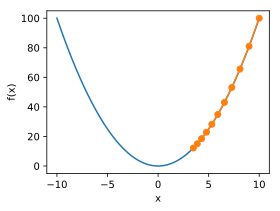

In [13]:
show_trace(gd(0.05))

epoch 10, x: 1.0239999999999867e-16


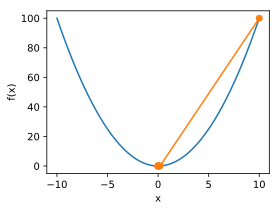

In [68]:
show_trace(gd(0.49))

## 7.2.3 多维梯度下降

In [38]:
def train_2d(trainer):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    x1, x2, s1, s2 = -5, -2, 0, 0  # s1和s2是自变量状态，本章后续几节会使用
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

def show_trace_2d(f, results):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    print(x1) 
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1 -0.057646, x2 -0.000073
[[-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 ...
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]]


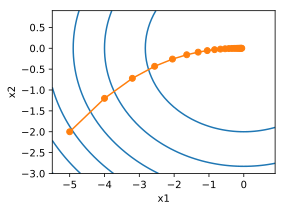

In [83]:
eta = 0.1

def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)


show_trace_2d(f_2d, train_2d(gd_2d))

## 7.2.4 随机梯度下降

epoch 20, x1 -0.501504, x2 0.091942
[[-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 ...
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]
 [-5.5 -5.4 -5.3 ...  0.7  0.8  0.9]]


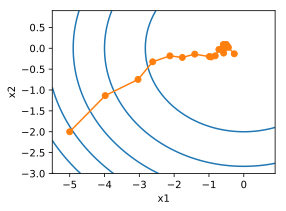

In [84]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

show_trace_2d(f_2d, train_2d(sgd_2d))

Text(0.5, 0, 'y')

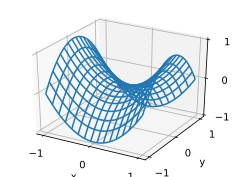

In [85]:
from mpl_toolkits import mplot3d # 三维画图
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1,  0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')